In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("weatherHistory.csv")
data = data[['Formatted Date', 'Temperature (C)']]
data['Date'] = pd.to_datetime(data['Formatted Date'], yearfirst=True)
data['Date_day'] = data['Date'].map(lambda date:f'{date.year}-{date.month}-{date.day}')  
data = data.sort_values(by=['Date'], ascending=True).reset_index()
data.head()

,index,Formatted Date,Temperature (C),Date,Date_day
0,2880,2006-01-01 00:00:00.000 +0100,0.577778,2006-01-01 00:00:00+01:00,2006-1-1
1,2881,2006-01-01 01:00:00.000 +0100,1.161111,2006-01-01 01:00:00+01:00,2006-1-1
2,2882,2006-01-01 02:00:00.000 +0100,1.666667,2006-01-01 02:00:00+01:00,2006-1-1
3,2883,2006-01-01 03:00:00.000 +0100,1.711111,2006-01-01 03:00:00+01:00,2006-1-1
4,2884,2006-01-01 04:00:00.000 +0100,1.183333,2006-01-01 04:00:00+01:00,2006-1-1


In [3]:
data_day = data.groupby(['Date_day'])['Temperature (C)'].mean().reset_index()  
data_day['Date'] = pd.to_datetime(data_day['Date_day'], yearfirst=True)
data_day = data_day.sort_values(by=['Date'], ascending=True).reset_index()
data_day['Date_DD'] = data_day['Date'].map(lambda date:f'{30*(date.month-1) + date.day}') 
data_day['Date_MD'] = data_day['Date'].map(lambda date:f'{date.month}-{date.day}')   
data_day.tail(5)

,index,Date_day,Temperature (C),Date,Date_DD,Date_MD
4013,3763,2016-12-27,0.280324,2016-12-27,357,12-27
4014,3764,2016-12-28,0.224306,2016-12-28,358,12-28
4015,3765,2016-12-29,0.169676,2016-12-29,359,12-29
4016,3767,2016-12-30,0.119444,2016-12-30,360,12-30
4017,3768,2016-12-31,0.072454,2016-12-31,361,12-31


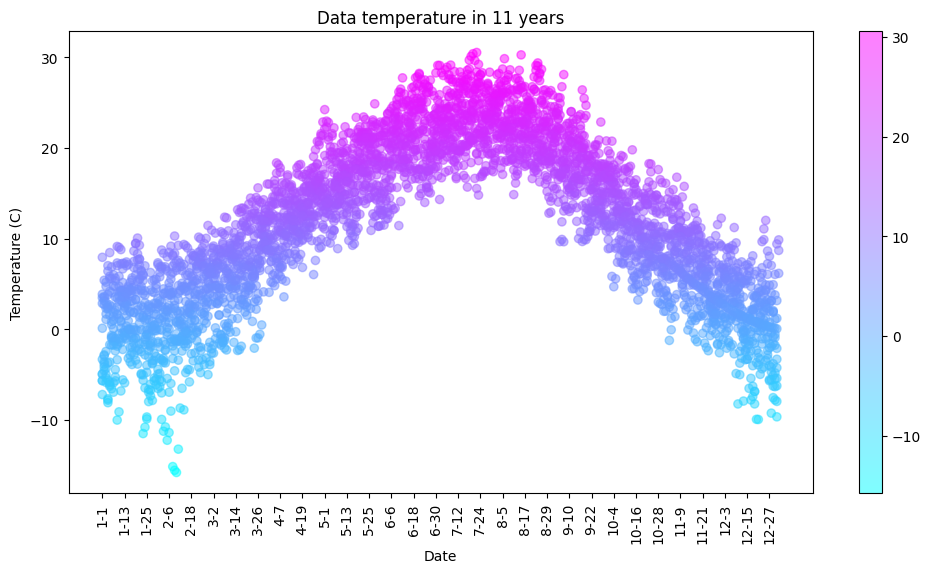

In [4]:
plt.figure(figsize=(12,6))

plt.scatter(data_day['Date_MD'].to_numpy(), data_day['Temperature (C)'].to_numpy(),\
    alpha=.5, c=data_day['Temperature (C)'], cmap='cool')
plt.colorbar()
plt.title("Data temperature in 11 years")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation='vertical')
plt.xticks(np.arange(0, 365, 12))
plt.show()

In [13]:
from perceptron import Perceptron

X = data_day['Date_DD'].copy().to_numpy(int)
Y = data_day['Temperature (C)'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)

In [14]:
model = Perceptron(1, learning_rate=0.00003, function='linear')
L_train, A_train, L_test, A_test = model.fit(X_train, Y_train, X_test, Y_test, epochs=200)

100%|██████████| 200/200 [01:16<00:00,  2.62it/s]


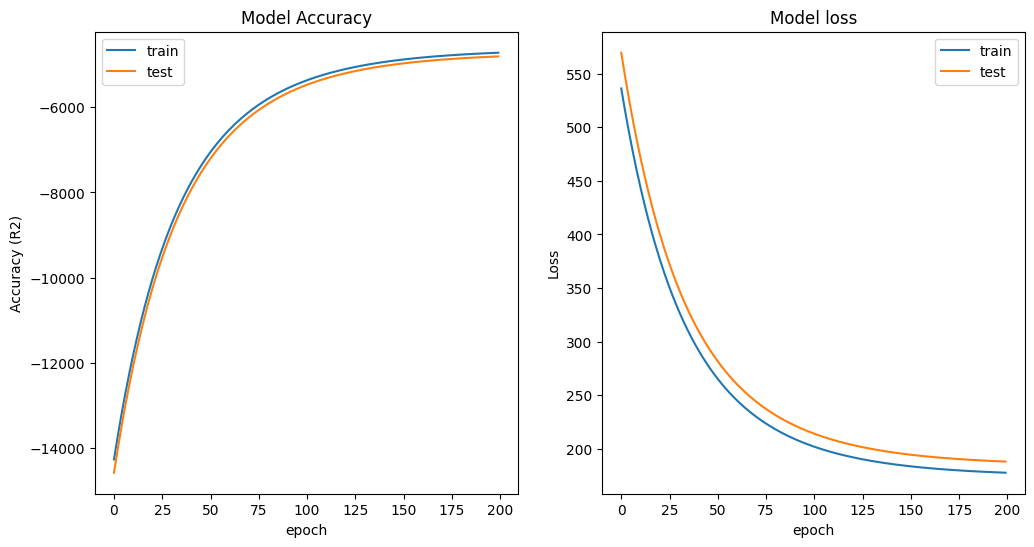

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(A_train)
ax1.plot(A_test)
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy (R2)")
ax1.legend(['train','test'])

ax2.plot(L_train)
ax2.plot(L_test)
ax2.set_title("Model loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])

plt.show()

In [19]:
model.predict([22])[0,0]

15.446133450115543

In [21]:
model.W

array([0.03763176])

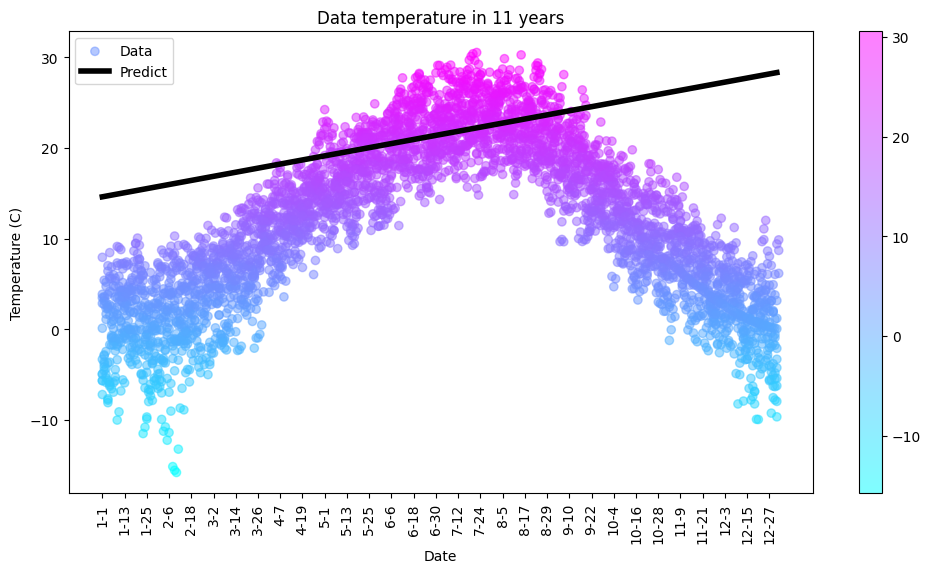

In [32]:
plt.figure(figsize=(12,6))

plt.scatter(data_day['Date_MD'].to_numpy(), data_day['Temperature (C)'].to_numpy(),\
    alpha=.5, c=data_day['Temperature (C)'], cmap='cool')
plt.plot(model.W[0]*range(365) + model.b[0], c='black', linewidth=4)
plt.colorbar()
plt.title("Data temperature in 11 years")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation='vertical')
plt.xticks(np.arange(0, 365, 12))
plt.legend(['Data', 'Predict'])
plt.show()

### save

In [ ]:
np.save("weight_W.npy", model.W[0])
np.save("weight_b.npy", model.b[0])